<a href="https://colab.research.google.com/github/amfakh/FGA-Project/blob/master/Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

Karena Google Colab belum menerapkan TensorFlow v2.0 ke dalam environment, maka TensorFlow akan mengeluarkan warning bahwa versi yang dipakai sudah depecrated

Oleh karena itu digunakan sintaks sebagai berikut 

```
deprecation._PRINT_DEPRECATION_WARNINGS = False
```



In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

# Praproses Dataset

## Unduh Dataset

Sebagai contoh, digunakan dataset fashion MNIST yang sudah disediakan oleh keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Deklarasi kelas untuk jenis-jenis pakaian yang ada dalam dataset

In [ ]:
class_names = ['T-Shirt', 'Celana Panjang', 'Hoodie', 'Kemeja', 'Jaket', 'Sandal', 'Kaos', 'Sneaker', 'Tas', 'Sepatu']

Tampilkan contoh data beserta colorbar

<Figure size 2016x2016 with 0 Axes>

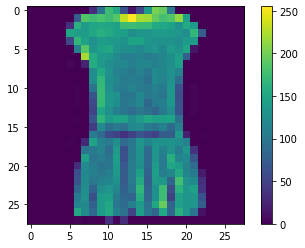

In [ ]:
plt.figure(figsize=(28,28))
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

Data yang dipakai sebanyak 25 gambar, sebelumnya data dilabeli dengan label yang sudah ditentukan sebelumnya.

Gambar diubah menjadi hitam putih dan ditampilkan untuk memeriksa apakah pelabelan pada data sudah benar.

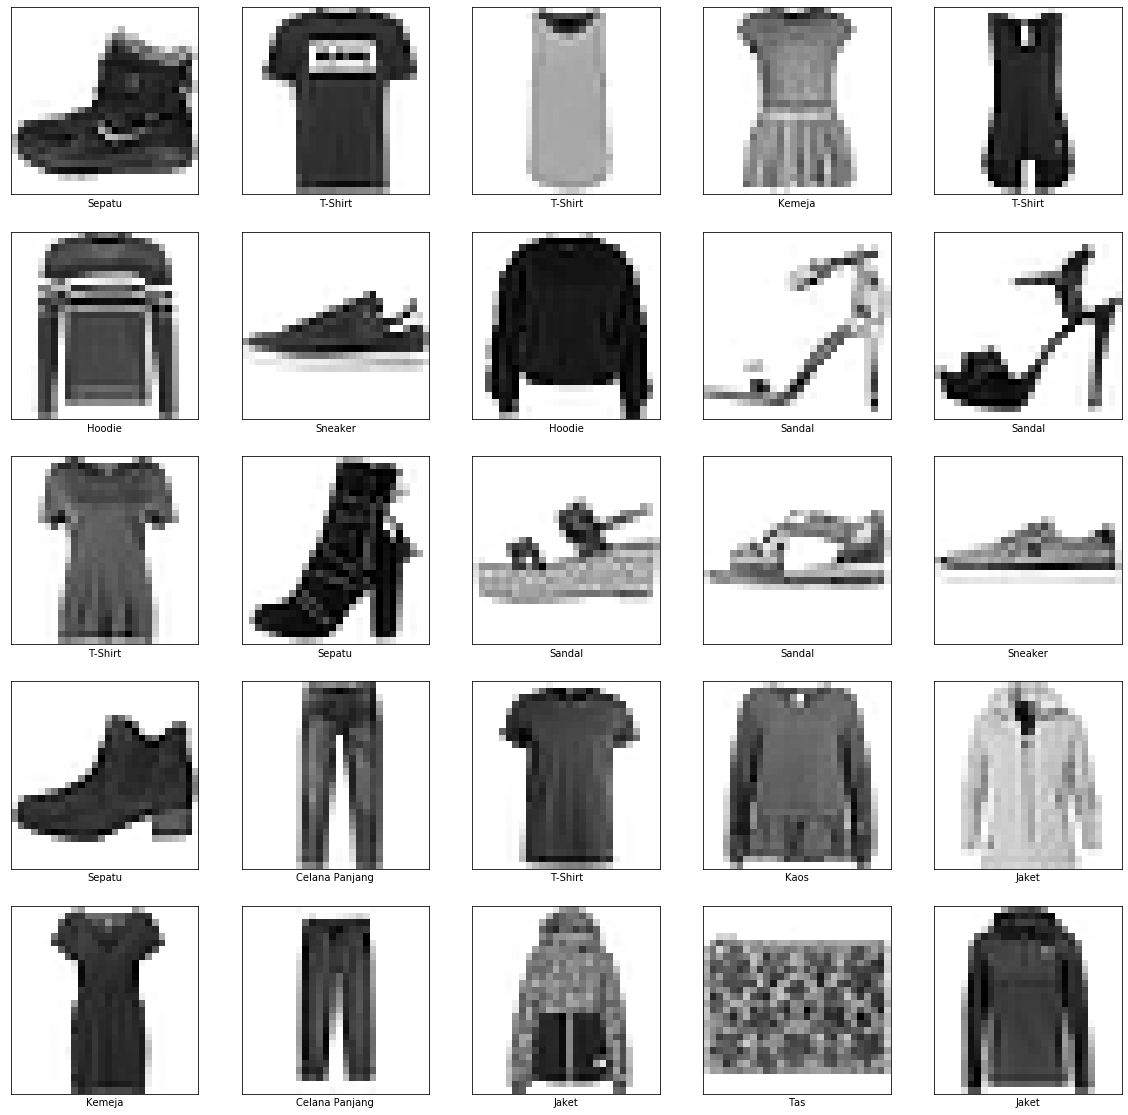

In [ ]:
plt.figure(figsize=(20,20))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

# Pembuatan Model

## Arsitektur Model

1. Model masuk ke input layer dan diubah menjadi bentuk 28*28
2. Model dioper  ke lapisan selanjutnya yang memiliki hidden layer sebanyak 128 dengan relu sebagai activation function
3. Model dioper ke lapisan output untuk melakukan prediksi gambar
4. Model menggunakan optimizer Adam dan akan diukur berdasarkan akurasi

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Model dilatih dengan epoch sebanyak 20

In [ ]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/sample - loss: 3.1971 - acc: 0.6791
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.7022 - acc: 0.7303
Epoch 3/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.6261 - acc: 0.7663
Epoch 4/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5622 - acc: 0.7976
Epoch 5/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5215 - acc: 0.8152
Epoch 6/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5070 - acc: 0.8238
Epoch 7/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4987 - acc: 0.8295
Epoch 8/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4811 - acc: 0.8354
Epoch 9/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4770 - acc: 0.8366
Epoch 10/20
60000/60000 [==============================] - 

## Pengecekan akurasi

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Akurasi: ', test_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.5177 - acc: 0.8371
Akurasi:  0.8371


## Prediksi Gambar

In [ ]:
predictions = model.predict(test_images)

Pembuatan fungsi untuk menampilkan hasil prediksi dan bar chart

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Menampilkan gambar, hasil prediksi, dan bar chart yang menampilkan kepercayaan model dalam memprediksi gambar

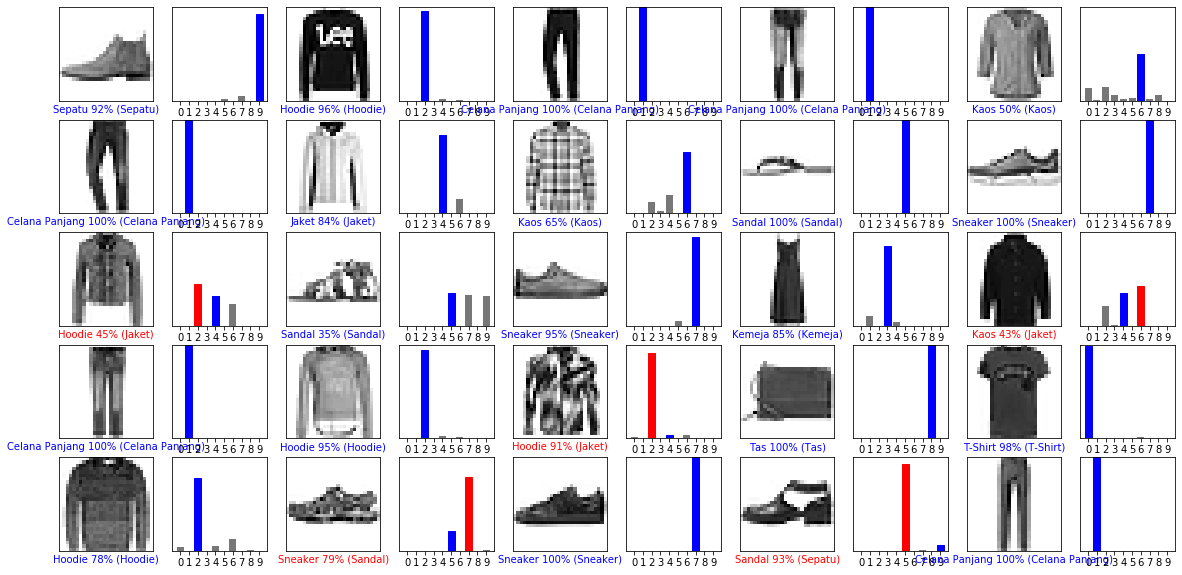

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
 plt.subplot(num_rows, 2*num_cols, 2*i+1)
 plot_image(i, predictions[i], test_labels, test_images)
 plt.subplot(num_rows, 2*num_cols, 2*i+2)
 plot_value_array(i, predictions[i], test_labels)

# Kesimpulan

Dengan melakukan training sebanyak 20 epoch, model telah berhasil mencapai akurasi ~84%